## EDA Case Study
#### Authors - Prabhat Sharma and Kishor Kunal  | DS 27 | 05-April-21
#### Objective
This is a Banking system case study on identifying the patterns that indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#cust_data = pd.read_csv('../input/credit-case-study/application_data.csv')
cust_data = pd.read_csv('Credit_EDA_Case_Study/application_data.csv')
cust_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Getting the shape of the dataset

In [3]:
cust_data.shape

(307511, 122)

# Distribution of target variable

In [4]:
defaulters = cust_data[cust_data.TARGET==1]
non_defaulters = cust_data[cust_data.TARGET==0]

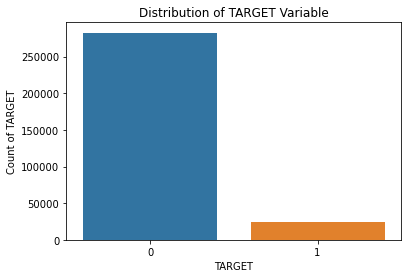

In [5]:
sns.countplot(cust_data.TARGET)
plt.xlabel("TARGET")
plt.ylabel("Count of TARGET")
plt.title("Distribution of TARGET Variable")
plt.show()

In [6]:
cust_data.TARGET.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

Inference:
It is clear from the analysis that most of the loans were repaid on time (92%). However, around 25000 (8%) loans were turned into bad loans. 

# Missing Values

In [7]:
percent_missing = cust_data.isnull().sum() * 100 / len(cust_data)
missing_values = pd.DataFrame({'columns':cust_data.columns,
                               'percentage missing': percent_missing})

In [8]:
missing_values.sort_values('percentage missing',inplace=True, ascending=False)

In [9]:
missing_values.head(60)

,columns,percentage missing
COMMONAREA_MEDI,COMMONAREA_MEDI,69.872297
COMMONAREA_AVG,COMMONAREA_AVG,69.872297
COMMONAREA_MODE,COMMONAREA_MODE,69.872297
NONLIVINGAPARTMENTS_MODE,NONLIVINGAPARTMENTS_MODE,69.432963
NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_AVG,69.432963
NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MEDI,69.432963
FONDKAPREMONT_MODE,FONDKAPREMONT_MODE,68.386172
LIVINGAPARTMENTS_MODE,LIVINGAPARTMENTS_MODE,68.354953
LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_AVG,68.354953
LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MEDI,68.354953


# Dropping Columns with high missing values

Columns having more than 60% of data missing can hardly be helpful to gain insights. Hence, the columns having more than 60% missing values are dropped.

In [10]:
retained_columns = list(missing_values[missing_values['percentage missing']<60].index)

In [11]:
cust_data = cust_data[retained_columns]

In [12]:
cust_data.shape

(307511, 105)

# Working with low missing values

In [13]:
low_missing_columns = pd.DataFrame(missing_values[(missing_values['percentage missing']>0) & (missing_values['percentage missing']<15)])
low_missing_columns

,columns,percentage missing
AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_HOUR,13.501631
AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_DAY,13.501631
AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_WEEK,13.501631
AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_MON,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_QRT,13.501631
AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_YEAR,13.501631
NAME_TYPE_SUITE,NAME_TYPE_SUITE,0.420148
OBS_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.332021
DEF_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.332021
OBS_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.332021


In [14]:
cust_data['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts(normalize=True).head()

0.0    0.993887
1.0    0.005865
2.0    0.000211
3.0    0.000034
4.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [15]:
cust_data['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts(normalize=True).head()

0.0    0.994402
1.0    0.004857
2.0    0.000399
3.0    0.000169
4.0    0.000098
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [16]:
cust_data['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts(normalize=True).head()

0.0    0.967909
1.0    0.030858
2.0    0.000748
3.0    0.000218
4.0    0.000128
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [17]:
cust_data['AMT_REQ_CREDIT_BUREAU_MON'].value_counts(normalize=True).head()

0.0    0.835488
1.0    0.124617
2.0    0.020249
3.0    0.007485
4.0    0.004045
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [18]:
cust_data['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts(normalize=True).head()

0.0    0.809863
1.0    0.127305
2.0    0.054182
3.0    0.006455
4.0    0.001790
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [19]:
cust_data['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts(normalize=True).head()

0.0    0.269937
1.0    0.238372
2.0    0.188697
3.0    0.126425
4.0    0.077875
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

As in the following columns

1. AMT_REQ_CREDIT_BUREAU_HOUR
2. AMT_REQ_CREDIT_BUREAU_DAY
3. AMT_REQ_CREDIT_BUREAU_WEEK
4. AMT_REQ_CREDIT_BUREAU_MON
5. AMT_REQ_CREDIT_BUREAU_QRT
6. AMT_REQ_CREDIT_BUREAU_YEAR

most record has 0 as the value, we can impute 0 at null places. 
Here 0 signifies that no enquiry was made during that time.

In [20]:
cust_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0,inplace=True)

In [21]:
cust_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0,inplace=True)

In [22]:
cust_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0,inplace=True)

In [23]:
cust_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0,inplace=True)

In [24]:
cust_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0,inplace=True)

In [25]:
cust_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0,inplace=True)

# Lets look at the table info once

In [26]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 105 entries, LANDAREA_MEDI to SK_ID_CURR
dtypes: float64(49), int64(41), object(15)
memory usage: 246.3+ MB


We are having three kinds of data types : float64, int64, object.
Lets have a look at the kind of data they contains

In [27]:
cust_data.select_dtypes('object').columns

Index(['WALLSMATERIAL_MODE', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE',
       'OCCUPATION_TYPE', 'NAME_TYPE_SUITE', 'NAME_CONTRACT_TYPE',
       'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'NAME_HOUSING_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE'],
      dtype='object')

In [28]:
cust_data.select_dtypes('float64').columns

Index(['LANDAREA_MEDI', 'LANDAREA_MODE', 'LANDAREA_AVG', 'BASEMENTAREA_MEDI',
       'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'EXT_SOURCE_1',
       'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI',
       'ELEVATORS_MEDI', 'ELEVATORS_AVG', 'ELEVATORS_MODE', 'APARTMENTS_MEDI',
       'APARTMENTS_AVG', 'APARTMENTS_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_AVG',
       'ENTRANCES_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MODE',
       'LIVINGAREA_MEDI', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BEGINEXPLUATATION_AVG', 'TOTALAREA_MODE', 'EXT_SOURCE_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2',
    

In [29]:
cust_data.select_dtypes('int64').columns

Index(['CNT_CHILDREN', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_21',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_12', 'FLAG_PHONE',
       'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', 'TARGET',
       'REG_CITY_NOT_LIVE_CITY', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_LIVE_REGION',
       'HOUR_APPR_PROCESS_START', 'REGION_RATING_CLIENT_W_CITY',
       'REGION_RATING_CLIENT', 'FLAG_EMAIL', 'FLAG_CONT_MOBILE',
       'FLAG_WORK_PHONE', 'FLAG_EMP_PHONE', 'FLAG_MOBIL', 'DAYS_ID_PUBLISH',
       'DAYS_EMPLOYED', 'DAYS_BIRTH', 'SK_ID_CURR'],
      dtype='object')

Observation: int columns contains lots of FLAG_<XYZ> values. FLAG values generally consists of 2 values (0,1 or T, F). Let's verify the same.

In [30]:
cust_data.select_dtypes('int64').apply(pd.Series.nunique,axis = 0)

CNT_CHILDREN                       15
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_9                     2
FLAG_DOCUMENT_21                    2
FLAG_DOCUMENT_10                    2
FLAG_DOCUMENT_11                    2
FLAG_DOCUMENT_13                    2
FLAG_DOCUMENT_14                    2
FLAG_DOCUMENT_15                    2
FLAG_DOCUMENT_16                    2
FLAG_DOCUMENT_17                    2
FLAG_DOCUMENT_18                    2
FLAG_DOCUMENT_19                    2
FLAG_DOCUMENT_20                    2
FLAG_DOCUMENT_12                    2
FLAG_PHONE                          2
LIVE_CITY_NOT_WORK_CITY             2
REG_CITY_NOT_WORK_CITY              2
TARGET                              2
REG_CITY_NOT_LIVE_CITY              2
LIVE_REGION_

As anticipated lots of int columns have 2 values. To better utilise these columns, we can convert them into categorical values (Y or N)

In [31]:
#cols_to_convert=list(cust_data[(cust_data.nunique==2)&(cust_data.dtypes=="int64")].index,axis=0)
cols_to_convert = ['FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_21',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_12', 'FLAG_PHONE',
       'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', 'TARGET',
       'REG_CITY_NOT_LIVE_CITY', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_LIVE_REGION',
       'FLAG_EMAIL', 'FLAG_CONT_MOBILE','FLAG_WORK_PHONE', 'FLAG_EMP_PHONE', 'FLAG_MOBIL']

#function to convert columns
def convert(cust_data, cols_to_convert):
    for y in cols_to_convert:
        cust_data.loc[:,y].replace((0, 1), ('N', 'Y'), inplace=True)
    return cust_data

convert(cust_data, cols_to_convert)
cust_data.TARGET.replace(('N', 'Y'), (0, 1), inplace=True)
cust_data.dtypes.value_counts()

float64    49
object     47
int64       9
dtype: int64

# Analysis

# NAME_CONTRACT_TYPE

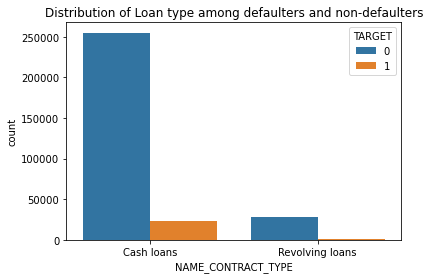

In [32]:
sns.countplot(x='NAME_CONTRACT_TYPE',data=cust_data,hue='TARGET')
plt.title('Distribution of Loan type among defaulters and non-defaulters')
plt.show()

#### ** Cash loans are much higher than Revolving loans in both cases(Target=0 and Target=1)

# GENDER

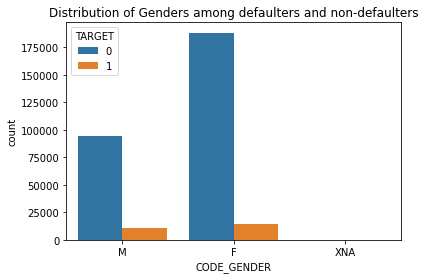

In [33]:
sns.countplot(x='CODE_GENDER',data=cust_data,hue='TARGET')
plt.title('Distribution of Genders among defaulters and non-defaulters')
plt.show()

In [34]:
cust_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

#### ** Number of females taking loans are much higher than number of males.

# FLAG_OWN_CAR

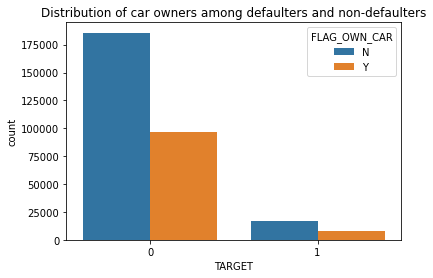

In [35]:
sns.countplot(x='TARGET',data=cust_data,hue='FLAG_OWN_CAR')
plt.title('Distribution of car owners among defaulters and non-defaulters')
plt.show()

#### **Most of the people applying for loan does not own a car. Also, ratio of people who owns a car have high chance of being a non-defaulter.

# FLAG_OWN_REALTY

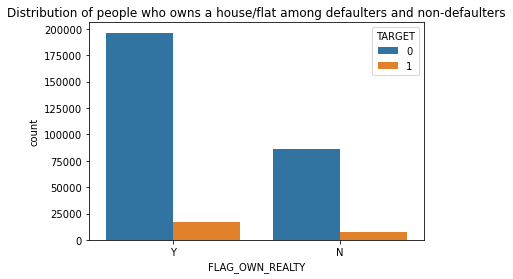

In [36]:
sns.countplot(x='FLAG_OWN_REALTY',data=cust_data,hue='TARGET')
plt.title('Distribution of people who owns a house/flat among defaulters and non-defaulters')
plt.show()

#### **Most people who owns a house have taken more loans and remained non-defaulters.

# TYPE OF HOUSE

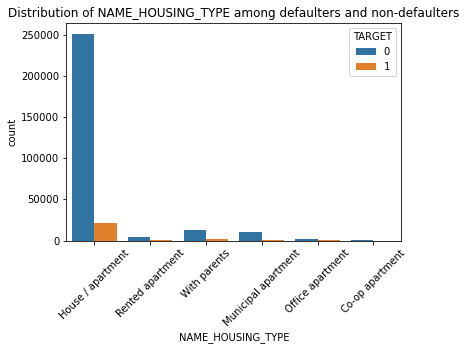

In [37]:
sns.countplot(x='NAME_HOUSING_TYPE',data=cust_data,hue='TARGET')
plt.title('Distribution of NAME_HOUSING_TYPE among defaulters and non-defaulters')
plt.xticks(rotation=45)
plt.show()

#### **People who live in houses/apartments have more chances of taking loans and also being a defaulter. However, people who live with parents have higher chances of having payment difficulties (as the ratio of defaulter and non-defaulter is more)

# NUMBER OF CHILDREN

In [38]:
cust_data['CNT_CHILDREN'].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

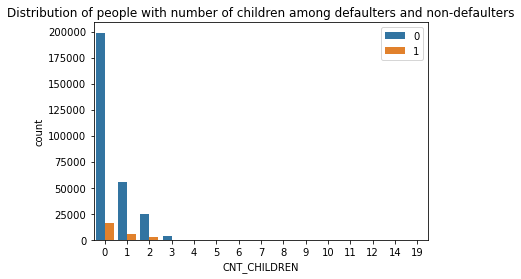

In [39]:
sns.countplot(x='CNT_CHILDREN',data=cust_data,hue='TARGET')
plt.title('Distribution of people with number of children among defaulters and non-defaulters')
plt.legend(loc='upper right')
plt.show()

#### **People tend to take loans when they have fewer or no children. However ratio of people taking loans having 2 or 3 children is more.

# FAMILY STATUS

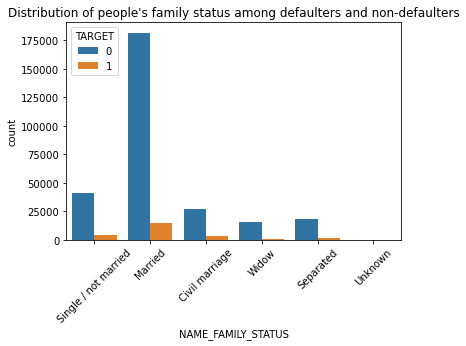

In [40]:
sns.countplot(x='NAME_FAMILY_STATUS',data=cust_data,hue='TARGET')
plt.title("Distribution of people's family status among defaulters and non-defaulters")
plt.xticks(rotation=45)
plt.show()

#### **Married people tend to take more loans. Also it looks they face more payment difficulties.

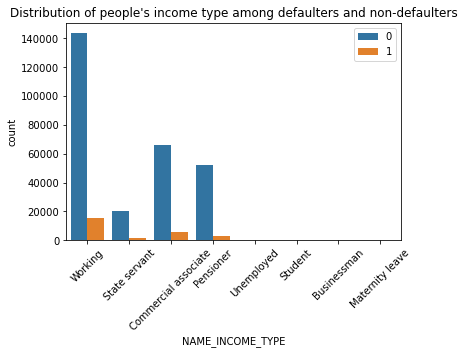

In [41]:
sns.countplot(x='NAME_INCOME_TYPE',data=cust_data,hue='TARGET')
plt.title("Distribution of people's income type among defaulters and non-defaulters")
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()

### **Commercial associates, Pensioners, State servants have higher ratio to total in non-defaulters

# EDUCATIONAL STAUTS

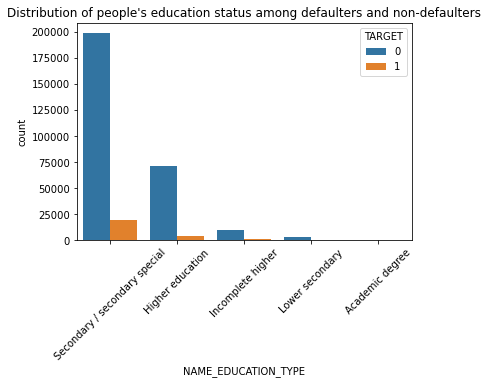

In [42]:
sns.countplot(x='NAME_EDUCATION_TYPE',data=cust_data,hue='TARGET')
plt.title("Distribution of people's education status among defaulters and non-defaulters")
plt.xticks(rotation=45)
plt.show()

#### **People with academic degrees rarely take loans. People with secondary or higher education take more loans.

# OCCUPATION TYPE

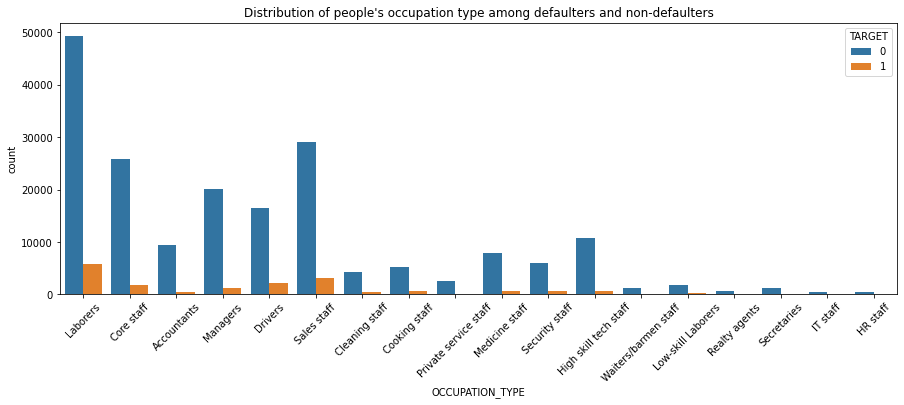

In [43]:
plt.figure(figsize=(15,5))
sns.countplot(x='OCCUPATION_TYPE',data=cust_data,hue='TARGET')
plt.title("Distribution of people's occupation type among defaulters and non-defaulters")
plt.xticks(rotation=45)
plt.show()

# PERMANENT, CONTACT AND WORK ADDRESS

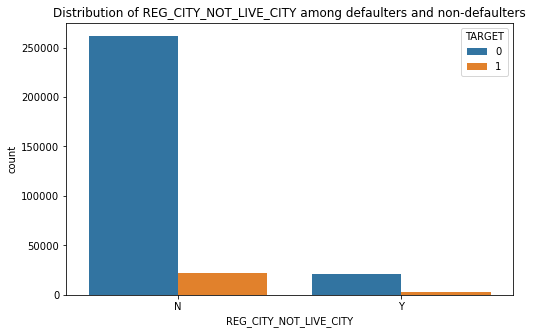

In [44]:
plt.figure(figsize=(8,5))
sns.countplot(x='REG_CITY_NOT_LIVE_CITY',data=cust_data,hue='TARGET')
plt.title("Distribution of REG_CITY_NOT_LIVE_CITY among defaulters and non-defaulters")
plt.show()

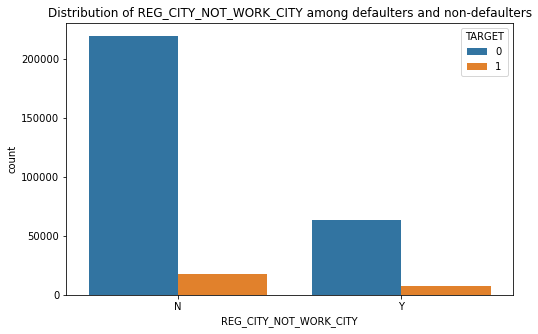

In [45]:
plt.figure(figsize=(8,5))
sns.countplot(x='REG_CITY_NOT_WORK_CITY',data=cust_data,hue='TARGET')
plt.title("Distribution of REG_CITY_NOT_WORK_CITY among defaulters and non-defaulters")
plt.show()

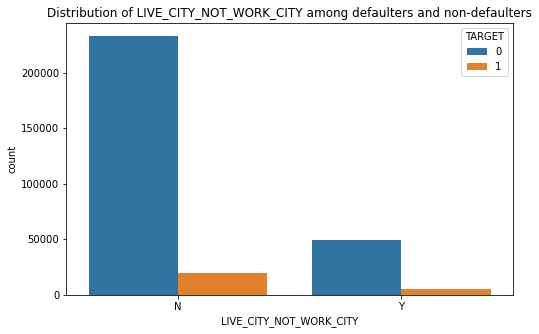

In [46]:
plt.figure(figsize=(8,5))
sns.countplot(x='LIVE_CITY_NOT_WORK_CITY',data=cust_data,hue='TARGET')
plt.title("Distribution of LIVE_CITY_NOT_WORK_CITY among defaulters and non-defaulters")
plt.show()

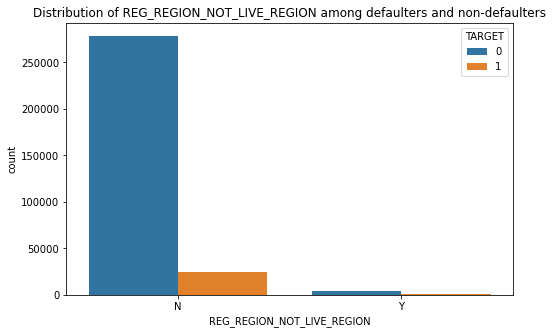

In [47]:
plt.figure(figsize=(8,5))
sns.countplot(x='REG_REGION_NOT_LIVE_REGION',data=cust_data,hue='TARGET')
plt.title("Distribution of REG_REGION_NOT_LIVE_REGION among defaulters and non-defaulters")
plt.show()

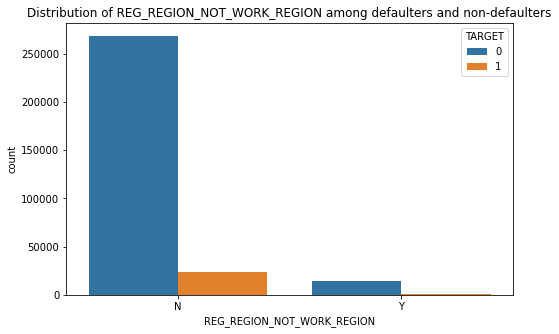

In [48]:
plt.figure(figsize=(8,5))
sns.countplot(x='REG_REGION_NOT_WORK_REGION',data=cust_data,hue='TARGET')
plt.title("Distribution of REG_REGION_NOT_WORK_REGION among defaulters and non-defaulters")
plt.show()

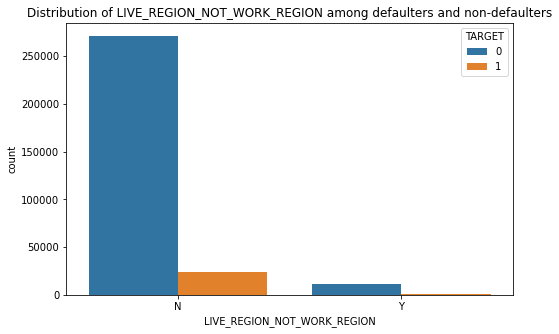

In [49]:
plt.figure(figsize=(8,5))
sns.countplot(x='LIVE_REGION_NOT_WORK_REGION',data=cust_data,hue='TARGET')
plt.title("Distribution of LIVE_REGION_NOT_WORK_REGION among defaulters and non-defaulters")
plt.show()

#### 1. Ratio of people whose Registration city is not same as live city or work city is higher in case of defaulters.This means people who work or live in other than their registration city are more likely to face payment difficulties. 
#### 2. Similar patterns have been observed with living city and working city

# ORGANIZATION TYPE

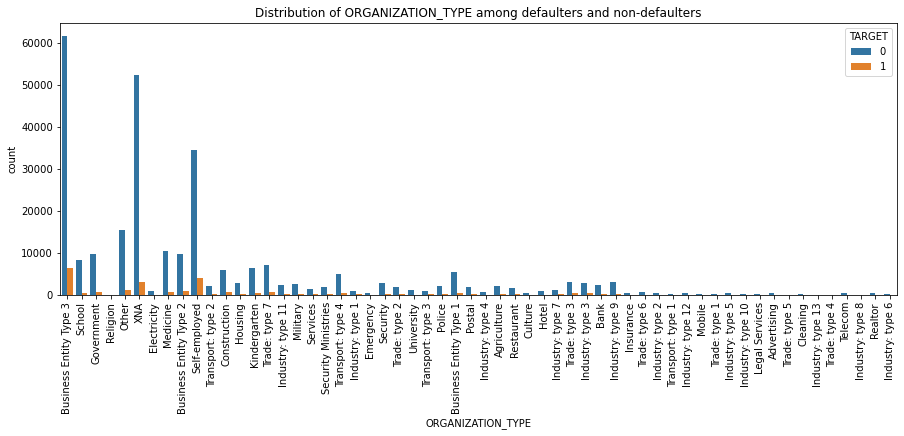

In [50]:
plt.figure(figsize=(15,5))
sns.countplot(x='ORGANIZATION_TYPE',data=cust_data,hue='TARGET')
plt.title("Distribution of ORGANIZATION_TYPE among defaulters and non-defaulters")
plt.xticks(rotation=90)
plt.show()

# INCOME TYPE

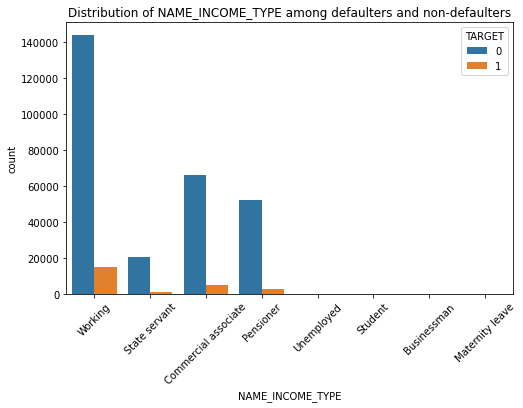

In [51]:
plt.figure(figsize=(8,5))
sns.countplot(x='NAME_INCOME_TYPE',data=cust_data,hue='TARGET')
plt.title("Distribution of NAME_INCOME_TYPE among defaulters and non-defaulters")
plt.xticks(rotation=45)
plt.show()

# OCCUPATION TYPE

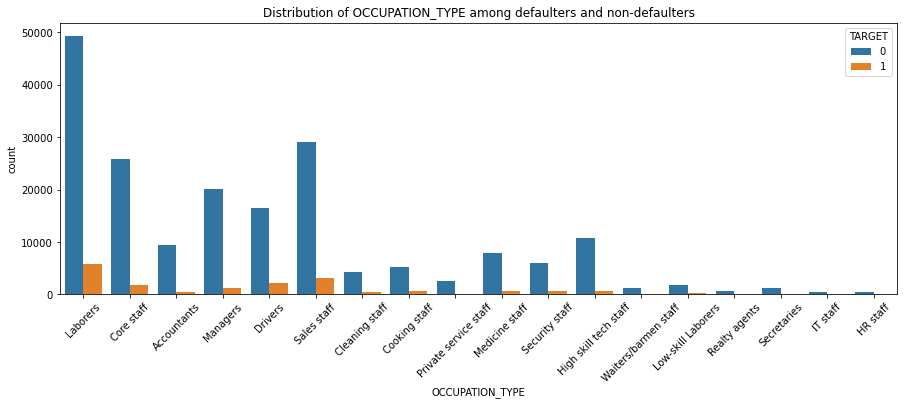

In [52]:
plt.figure(figsize=(15,5))
sns.countplot(x='OCCUPATION_TYPE',data=cust_data,hue='TARGET')
plt.title("Distribution of OCCUPATION_TYPE among defaulters and non-defaulters")
plt.xticks(rotation=45)
plt.show()

# UNIVARIATE AND BIVARIATE ANALYSIS ON NUMERIC COLUMNS

In [53]:
cust_data.select_dtypes('object').columns

Index(['WALLSMATERIAL_MODE', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE',
       'OCCUPATION_TYPE', 'NAME_TYPE_SUITE', 'FLAG_DOCUMENT_8',
       'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_OWN_REALTY', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_12', 'FLAG_PHONE', 'LIVE_CITY_NOT_WORK_CITY',
       'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_WORK_REGION',
       'REG_REGION_NOT_LIVE_REGION', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_EMAIL', 'FLAG_CONT_MOBILE', 'ORGANIZATION_TYPE',
       'FLAG_WORK_PHONE', 'FLAG_EMP_PHONE', 'FLAG_MOBIL', 'NAME_HOUS

In [54]:
cust_data.select_dtypes('int64').columns

Index(['CNT_CHILDREN', 'TARGET', 'HOUR_APPR_PROCESS_START',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'DAYS_ID_PUBLISH', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'SK_ID_CURR'],
      dtype='object')

In [55]:
cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',]

In [56]:
#sns.set(style='ticks',color_codes=True)
#sns.pairplot(cust_data,vars=cols)

# AMT_INCOME_TOTAL

Checking for outliers

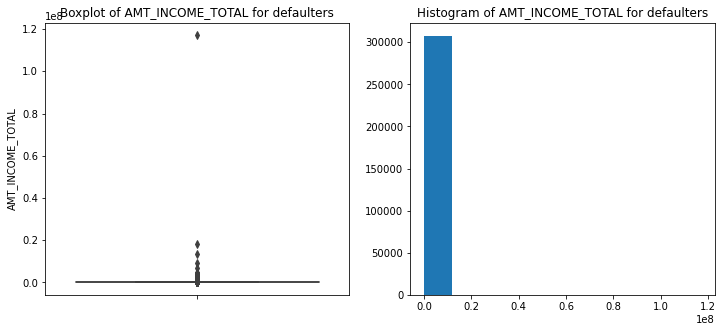

In [57]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y=cust_data['AMT_INCOME_TOTAL'])
plt.title('Boxplot of AMT_INCOME_TOTAL for defaulters')
plt.subplot(1,2,2)
plt.hist(x=cust_data['AMT_INCOME_TOTAL'])
plt.title('Histogram of AMT_INCOME_TOTAL for defaulters')
plt.show()

It has some outliers. Removing entries above 99 pecentile:

In [58]:
new_cust_data = cust_data[cust_data['AMT_INCOME_TOTAL']<np.nanpercentile(cust_data['AMT_INCOME_TOTAL'],99)]

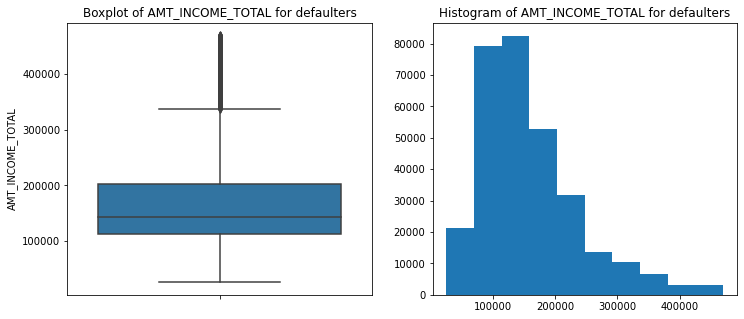

In [59]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y=new_cust_data['AMT_INCOME_TOTAL'])
plt.title('Boxplot of AMT_INCOME_TOTAL for defaulters')
plt.subplot(1,2,2)
plt.hist(x=new_cust_data['AMT_INCOME_TOTAL'])
plt.title('Histogram of AMT_INCOME_TOTAL for defaulters')
plt.show()

#### Most people who have defaulted having income between 100000 and 200000

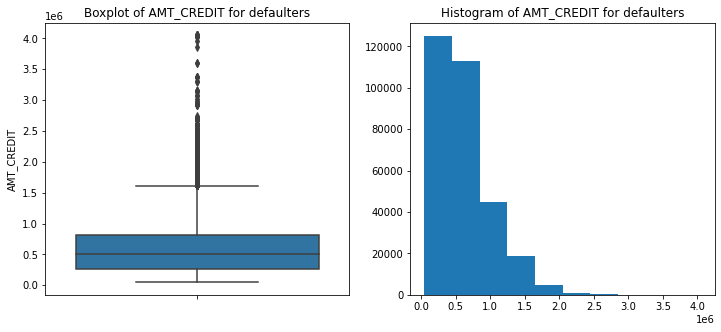

In [60]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y=cust_data['AMT_CREDIT'])
plt.title('Boxplot of AMT_CREDIT for defaulters')
plt.subplot(1,2,2)
plt.hist(x=cust_data['AMT_CREDIT'])
plt.title('Histogram of AMT_CREDIT for defaulters')
plt.show()


In [61]:
new_cust_data = cust_data[cust_data['AMT_CREDIT']<np.nanpercentile(cust_data['AMT_CREDIT'],99)]


# AGE DISTRIBUTIONS

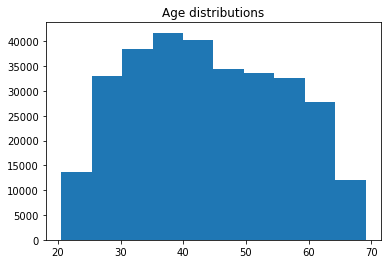

In [62]:
cust_data['AGE'] = cust_data['DAYS_BIRTH']/-365
plt.hist(cust_data['AGE'])
plt.title('Age distributions')
plt.show()

#### Age is mostly evenly distributed with 30-45 years being the most.

# DAYS EMPLOYED

In [63]:
cust_data['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

It shows the maximum value to be 365243 which is obviously an outlier as its impractical. We can replace the value with null

In [64]:
cust_data["DAYS_EMPLOYED"] = cust_data['DAYS_EMPLOYED'].replace(365243,np.NaN)
cust_data['DAYS_EMPLOYED'].describe()

count    252137.000000
mean      -2384.169325
std        2338.360162
min      -17912.000000
25%       -3175.000000
50%       -1648.000000
75%        -767.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

# YEARS EMPLOYED

In [65]:
cust_data['YEARS_EMPLOYED'] = (cust_data['DAYS_EMPLOYED']/-365)

In [66]:
defaulters = cust_data[cust_data.TARGET==1]
non_defaulters = cust_data[cust_data.TARGET==0]

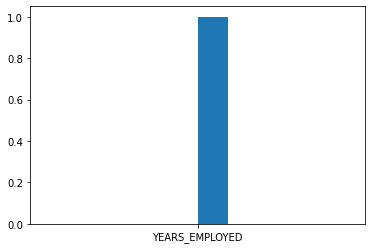

In [67]:
plt.hist('YEARS_EMPLOYED')
plt.show()

# BINNING OF AMT_INCOME_TOTAL

In [68]:
defaulters.loc[:,'INCOME_RANGE'] = pd.qcut(cust_data.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.10,0.35,0.50,0.90,1],labels=['Very_low','Low','Average','High','Very_High'])
non_defaulters.loc[:,'INCOME_RANGE'] = pd.qcut(cust_data.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.10,0.35,0.50,0.90,1],labels=['Very_low','Low','Average','High','Very_High'])

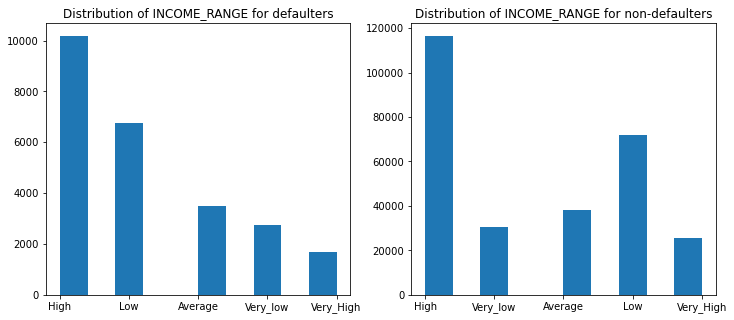

In [69]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(x=defaulters['INCOME_RANGE'])
plt.title('Distribution of INCOME_RANGE for defaulters')
plt.subplot(1,2,2)
plt.hist(x=non_defaulters['INCOME_RANGE'])
plt.title('Distribution of INCOME_RANGE for non-defaulters')
plt.show()

#### A large number of defaulters either have 'High' income or 'Low' income

# Bivariate Analysis

In [70]:
bivar_var = ['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','AMT_GOODS_PRICE','AMT_ANNUITY',
             'CNT_FAM_MEMBERS','DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT', 'AMT_INCOME_TOTAL',
             'DAYS_REGISTRATION', 'REGION_POPULATION_RELATIVE','CNT_CHILDREN', 
             'HOUR_APPR_PROCESS_START', 'REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT',
             'DAYS_ID_PUBLISH','DAYS_EMPLOYED', 'DAYS_BIRTH']

In [71]:
def_cor = defaulters[bivar_var].corr()

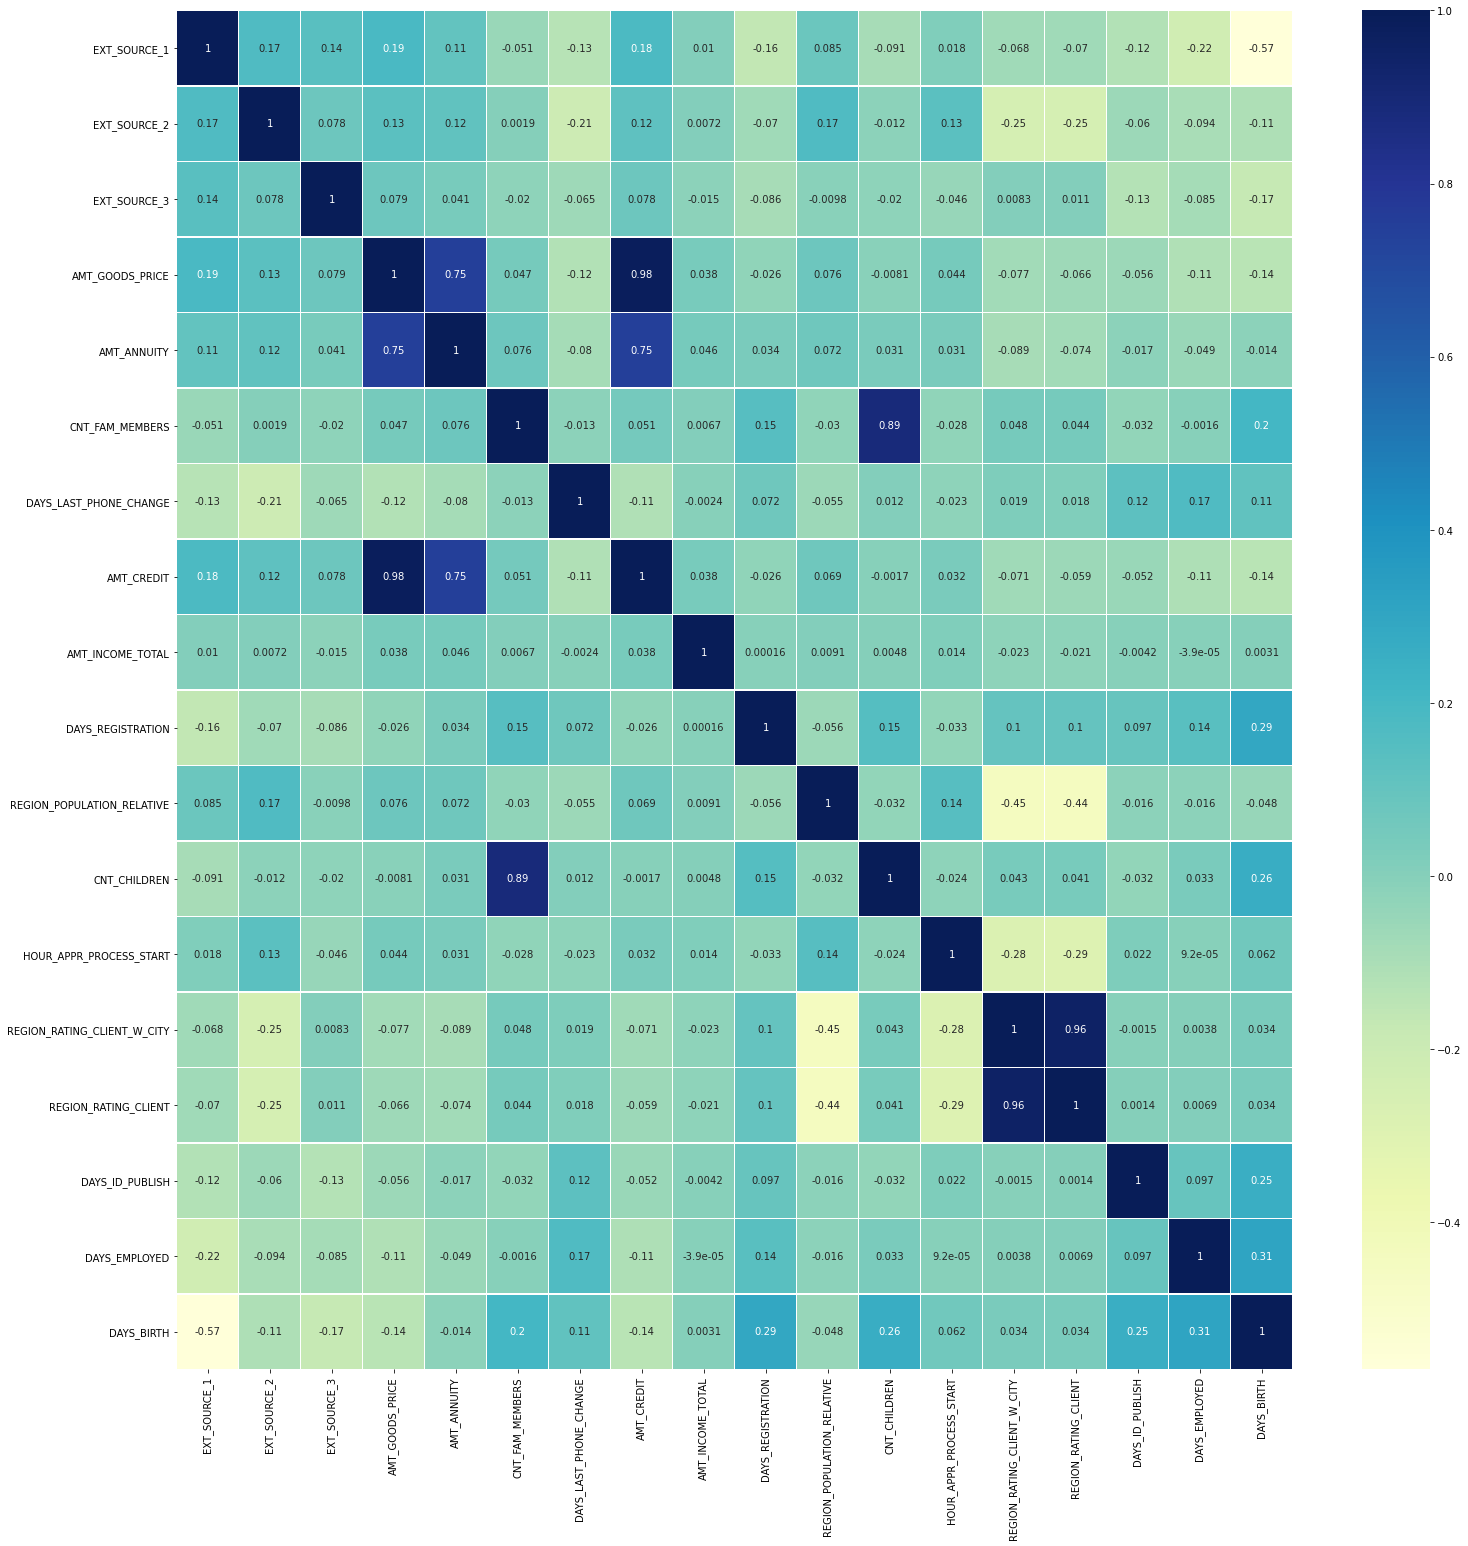

In [72]:
plt.figure(figsize=(25,25))
sns.heatmap(def_cor,cmap='YlGnBu',annot=True,linewidths=.5)
plt.show()

Top 5 positive correlation variables:

1. AMT_CREDIT - AMT_GOODS_PRICE
2. REGION_RATING_CLIENT_W_CITY - REGION_RATING_CLIENT
3. CNT_CHILDREN - CNT_FAM_MEMBERS
4. AMT_CREDIT - AMT_ANNUITY
5. AMT_GOODS_PRICE - AMT_ANNUITY


Top 5 negative correlation variables:

1. HOUR_APPR_PROCESS_START - REGION_RATING_CLIENT_W_CITY
2. REGION_RATING_CLIENT - HOUR_APPR_PROCESS_START
3. REGION_POPULATION_RELATIVE - REGION_RATING_CLIENT
4. REGION_RATING_CLIENT_W_CITY - REGION_POPULATION_RELATIVE
5. EXT_SOURCE_1 - DAYS_BIRTH


In [73]:
non_def_cor = non_defaulters[bivar_var].corr()

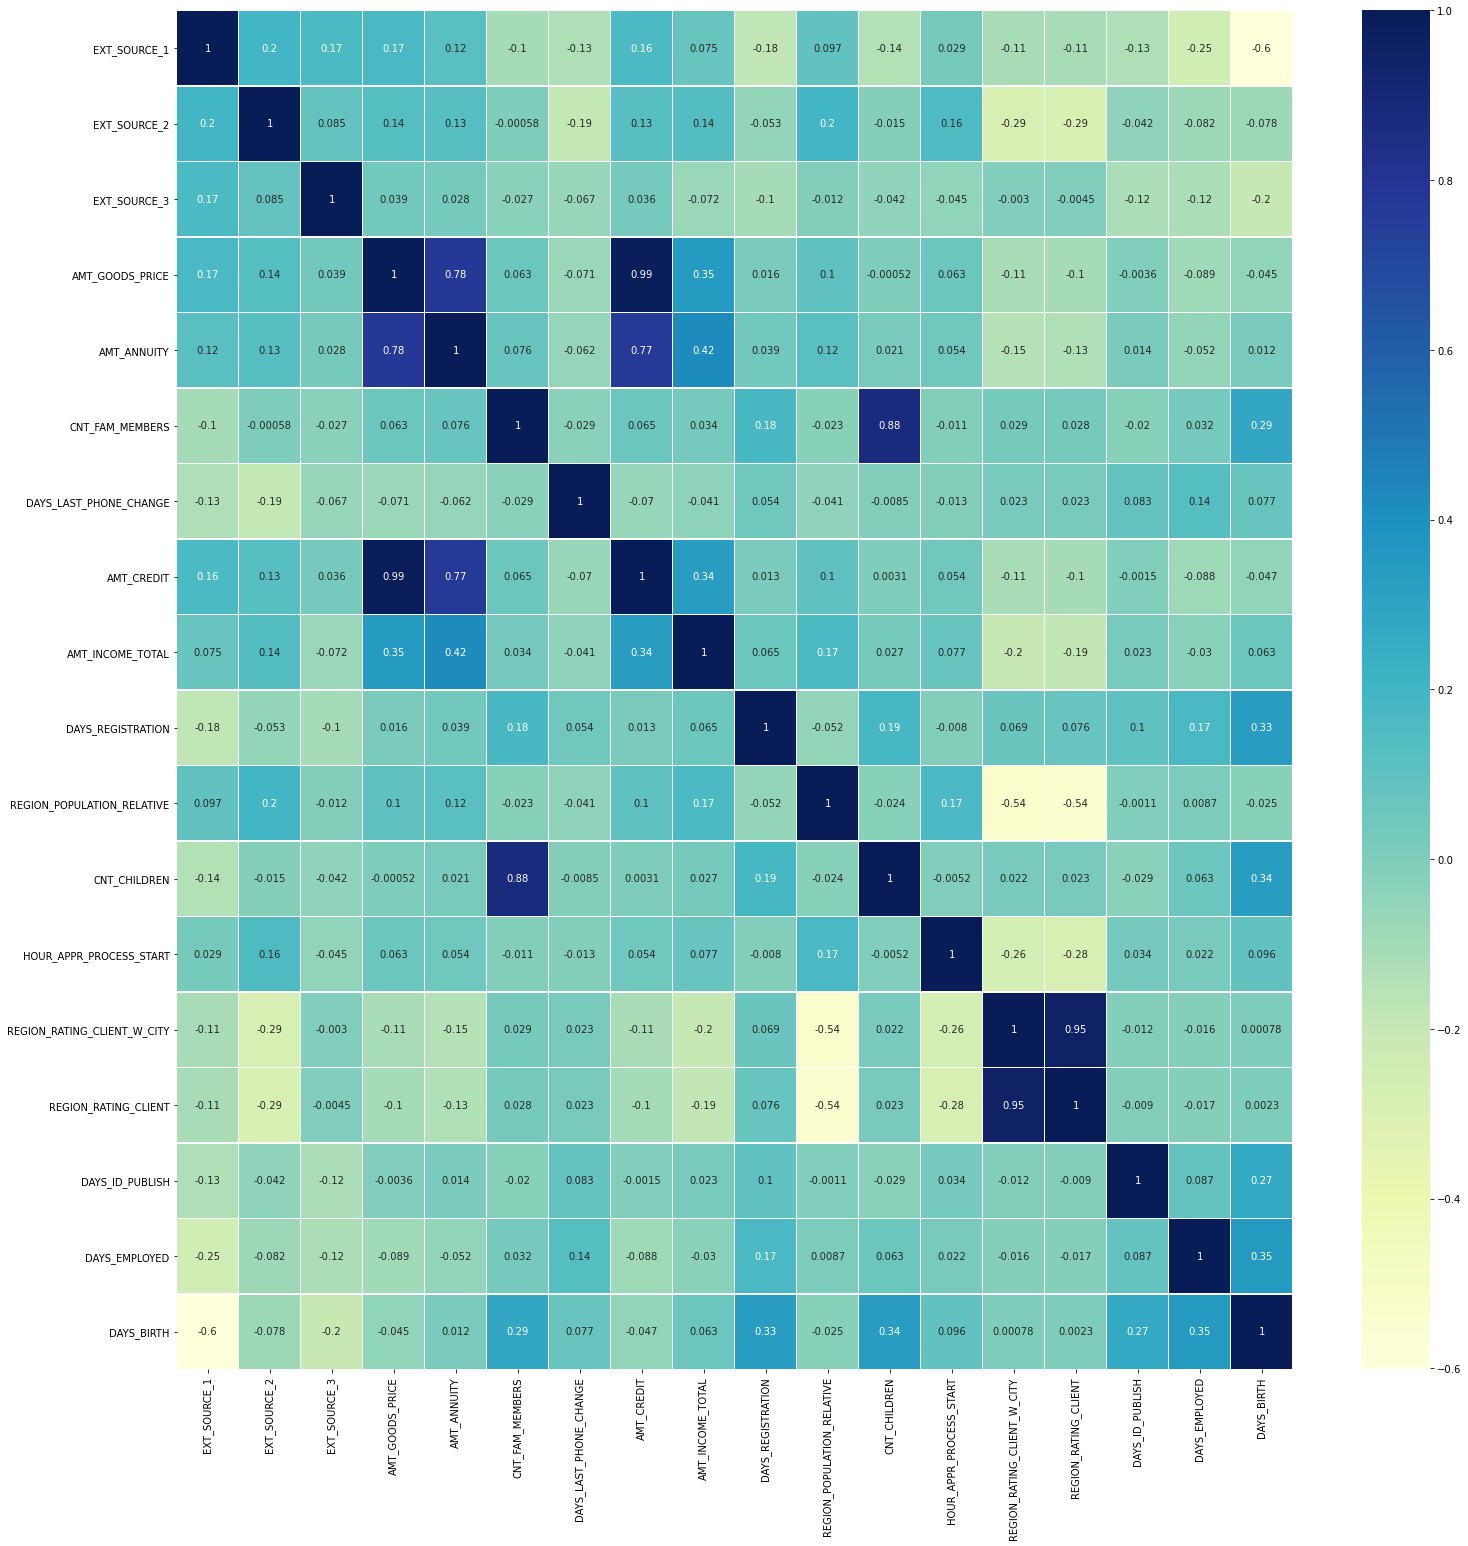

In [74]:
plt.figure(figsize=(25,25))
sns.heatmap(non_def_cor,cmap='YlGnBu',annot=True,linewidths=.5)
plt.show()

## Inferences from previously filed applications

In [91]:
#loading previous applicaitons data
df_cust_data_prev=pd.read_csv('Credit_EDA_Case_Study/previous_application.csv')

In [92]:
#checking shape of data
df_cust_data_prev.shape

(1670214, 37)

In [93]:
df_cust_data_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
df_cust_data_prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [95]:
df_cust_data_prev.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

We can see that there are some columns having very high number of null values

In [98]:
missing = df_cust_data_prev.isnull().sum() * 100 / len(df_cust_data_prev)
missing_df = pd.DataFrame({'columns':df_cust_data_prev.columns,
                               'percentage missing': missing})

In [99]:
missing_df.sort_values('percentage missing',inplace=True, ascending=False)

In [100]:
missing

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [101]:
columns_to_be_retained = list(missing_df[missing_df['percentage missing']<55].index)

In [102]:
df_cust_data_prev = df_cust_data_prev[columns_to_be_retained]

In [103]:
df_cust_data_prev.shape

(1670214, 35)

In [78]:
#checking diffrent status for previous applications

df_cust_data_prev.NAME_CONTRACT_STATUS.value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [79]:
#reducing the dataframe size as per our analysis

df_cust_data_prev = df_cust_data_prev[['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE',  'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'NAME_CONTRACT_STATUS']]

In [80]:
df_cust_data_prev.shape

(1670214, 6)

In [81]:
#checking current application IDs count for the given status

df_cust_data_prev[['NAME_CONTRACT_STATUS','SK_ID_CURR']].groupby(['NAME_CONTRACT_STATUS']).aggregate('count')

,SK_ID_CURR
NAME_CONTRACT_STATUS,
Approved,1036781
Canceled,316319
Refused,290678
Unused offer,26436


In [82]:
df_cust_data_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_CREDIT,AMT_DOWN_PAYMENT,NAME_CONTRACT_STATUS
0,2030495,271877,Consumer loans,17145.0,0.0,Approved
1,2802425,108129,Cash loans,679671.0,NaN,Approved
2,2523466,122040,Cash loans,136444.5,NaN,Approved
3,2819243,176158,Cash loans,470790.0,NaN,Approved
4,1784265,202054,Cash loans,404055.0,NaN,Refused


In [83]:

# splitting the huge data into 4 dataframes based on status - approved, canceled, refused, unused

df_approved= df_cust_data_prev[(df_cust_data_prev.NAME_CONTRACT_STATUS=='Approved')][['SK_ID_CURR','NAME_CONTRACT_STATUS']].groupby('SK_ID_CURR').aggregate('count')
df_canceled = df_cust_data_prev[(df_cust_data_prev.NAME_CONTRACT_STATUS=='Canceled')][['SK_ID_CURR','NAME_CONTRACT_STATUS']].groupby('SK_ID_CURR').aggregate('count')
df_refused = df_cust_data_prev[(df_cust_data_prev.NAME_CONTRACT_STATUS=='Refused')][['SK_ID_CURR','NAME_CONTRACT_STATUS']].groupby('SK_ID_CURR').aggregate('count')
df_unused_offer = df_cust_data_prev[(df_cust_data_prev.NAME_CONTRACT_STATUS=='Unused offer')][['SK_ID_CURR','NAME_CONTRACT_STATUS']].groupby('SK_ID_CURR').aggregate('count')

df_approved.reset_index(inplace=True)
df_approved.columns=['SK_ID_CURR','prev_approved_count']

df_canceled.reset_index(inplace=True)
df_canceled.columns=['SK_ID_CURR','prev_canceled_count']

df_refused.reset_index(inplace=True)
df_refused.columns=['SK_ID_CURR','prev_refused_count']

df_unused_offer.reset_index(inplace=True)
df_unused_offer.columns=['SK_ID_CURR','prev_unused_count']

In [84]:
# joining the customer dataframe to above created dataframes to get the count of previously applied applications
# i.e. count of approved applicaitons, refused applications, unused and canceled applications

cust_data = cust_data.join(df_approved['prev_approved_count'],how='left',on='SK_ID_CURR')
cust_data = cust_data.join(df_canceled['prev_canceled_count'],how='left',on='SK_ID_CURR')
cust_data = cust_data.join(df_refused['prev_refused_count'],how='left',on='SK_ID_CURR')
cust_data = cust_data.join(df_unused_offer['prev_unused_count'],how='left',on='SK_ID_CURR')

In [85]:
cust_data.head()

,LANDAREA_MEDI,LANDAREA_MODE,LANDAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_AVG,BASEMENTAREA_MODE,EXT_SOURCE_1,NONLIVINGAREA_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,...,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,SK_ID_CURR,AGE,YEARS_EMPLOYED,prev_approved_count,prev_canceled_count,prev_refused_count,prev_unused_count
0,0.0375,0.0377,0.0369,0.0369,0.0369,0.0383,0.083037,0.0,0.0000,0.00,...,Single / not married,Secondary / secondary special,Working,100002,25.920548,1.745205,1.0,8.0,2.0,NaN
1,0.0132,0.0128,0.0130,0.0529,0.0529,0.0538,0.311267,0.0,0.0098,0.01,...,Married,Higher education,State servant,100003,45.931507,3.254795,2.0,1.0,2.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Single / not married,Secondary / secondary special,Working,100004,52.180822,0.616438,5.0,9.0,1.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Civil marriage,Secondary / secondary special,Working,100006,52.068493,8.326027,1.0,2.0,1.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Single / not married,Secondary / secondary special,Working,100007,54.608219,8.323288,4.0,3.0,2.0,NaN


In [88]:
# filling NaN with 0
cust_data.prev_approved_count.fillna(0,inplace=True)
cust_data.prev_canceled_count.fillna(0,inplace=True)
cust_data.prev_refused_count.fillna(0,inplace=True)
cust_data.prev_unused_count.fillna(0,inplace=True)
cust_data.head()

,LANDAREA_MEDI,LANDAREA_MODE,LANDAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_AVG,BASEMENTAREA_MODE,EXT_SOURCE_1,NONLIVINGAREA_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,...,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,SK_ID_CURR,AGE,YEARS_EMPLOYED,prev_approved_count,prev_canceled_count,prev_refused_count,prev_unused_count
0,0.0375,0.0377,0.0369,0.0369,0.0369,0.0383,0.083037,0.0,0.0000,0.00,...,Single / not married,Secondary / secondary special,Working,100002,25.920548,1.745205,1.0,8.0,2.0,0.0
1,0.0132,0.0128,0.0130,0.0529,0.0529,0.0538,0.311267,0.0,0.0098,0.01,...,Married,Higher education,State servant,100003,45.931507,3.254795,2.0,1.0,2.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Single / not married,Secondary / secondary special,Working,100004,52.180822,0.616438,5.0,9.0,1.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Civil marriage,Secondary / secondary special,Working,100006,52.068493,8.326027,1.0,2.0,1.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Single / not married,Secondary / secondary special,Working,100007,54.608219,8.323288,4.0,3.0,2.0,0.0


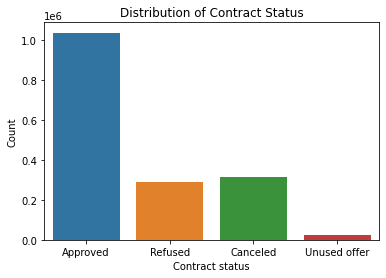

In [105]:
sns.countplot(df_cust_data_prev.NAME_CONTRACT_STATUS)
plt.xlabel('Contract status')
plt.ylabel('Count')
plt.title('Distribution of Contract Status')
plt.show()

#### Most of the loans were approved loans. More loans were canceled than refused.

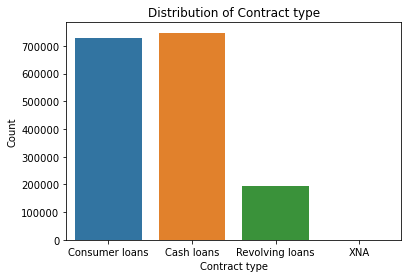

In [106]:
sns.countplot(df_cust_data_prev.NAME_CONTRACT_TYPE)
plt.xlabel('Contract type')
plt.ylabel('Count')
plt.title('Distribution of Contract type')
plt.show()

#### Most people opted for CASH LOANS and CONSUMER LOANS

In [108]:
approved = df_cust_data_prev[df_cust_data_prev['NAME_CONTRACT_STATUS']=='Approved']
refused = df_cust_data_prev[df_cust_data_prev['NAME_CONTRACT_STATUS']=='Refused']
canceled = df_cust_data_prev[df_cust_data_prev['NAME_CONTRACT_STATUS']=='Canceled']
unused = df_cust_data_prev[df_cust_data_prev['NAME_CONTRACT_STATUS']=='Unused Offer']

In [110]:
approved_percentage = (len(approved)*100)/len(df_cust_data_prev)
refused_percentage = (len(refused)*100)/len(df_cust_data_prev)
canceled_percentage = (len(canceled)*100)/len(df_cust_data_prev)
unused_percentage = (len(unused)*100)/len(df_cust_data_prev)

In [111]:
print('Whose loan has been approved',approved_percentage,'%')
print('Whose loan has been refused',refused_percentage,'%')
print('Whose loan has been canceled',canceled_percentage,'%')
print('Whose loan has been unused',unused_percentage,'%')

Whose loan has been approved 62.07474012312195 %
Whose loan has been refused 17.40363809667504 %
Whose loan has been canceled 18.93883059296593 %
Whose loan has been unused 0.0 %


In [113]:
df_cust_data_prev.select_dtypes('object').columns

Index(['NAME_TYPE_SUITE', 'PRODUCT_COMBINATION', 'NAME_YIELD_GROUP',
       'NAME_PORTFOLIO', 'NAME_SELLER_INDUSTRY', 'CHANNEL_TYPE',
       'NAME_PRODUCT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_CLIENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_CONTRACT_STATUS', 'NAME_CASH_LOAN_PURPOSE',
       'FLAG_LAST_APPL_PER_CONTRACT', 'WEEKDAY_APPR_PROCESS_START',
       'NAME_CONTRACT_TYPE', 'NAME_PAYMENT_TYPE'],
      dtype='object')

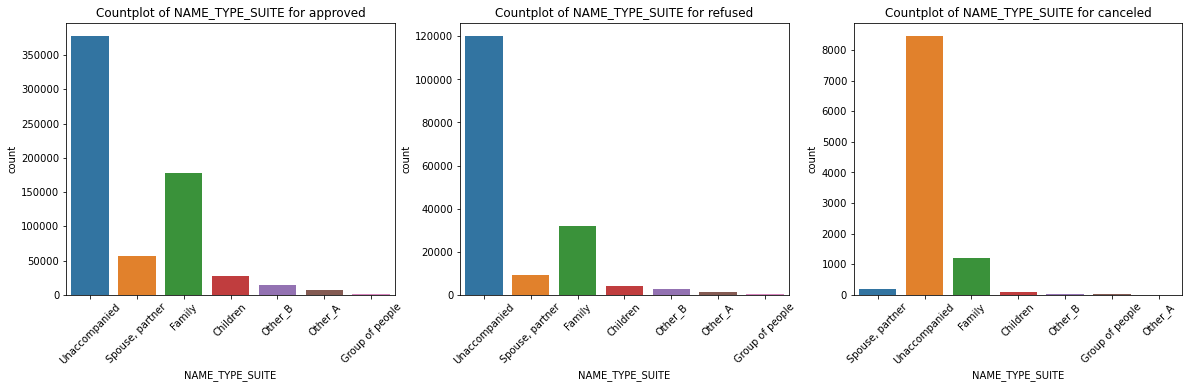

In [114]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.countplot(x=approved['NAME_TYPE_SUITE'])
plt.title('Countplot of NAME_TYPE_SUITE for approved')
plt.xticks(rotation=45)
plt.subplot(1,3,2)
sns.countplot(x=refused['NAME_TYPE_SUITE'])
plt.title('Countplot of NAME_TYPE_SUITE for refused')
plt.xticks(rotation=45)
plt.subplot(1,3,3)
sns.countplot(x=canceled['NAME_TYPE_SUITE'])
plt.title('Countplot of NAME_TYPE_SUITE for canceled')
plt.xticks(rotation=45)
plt.show()

### In all 3 catagories most of the loans are classified as unrecognized. Family is the highest recognised category

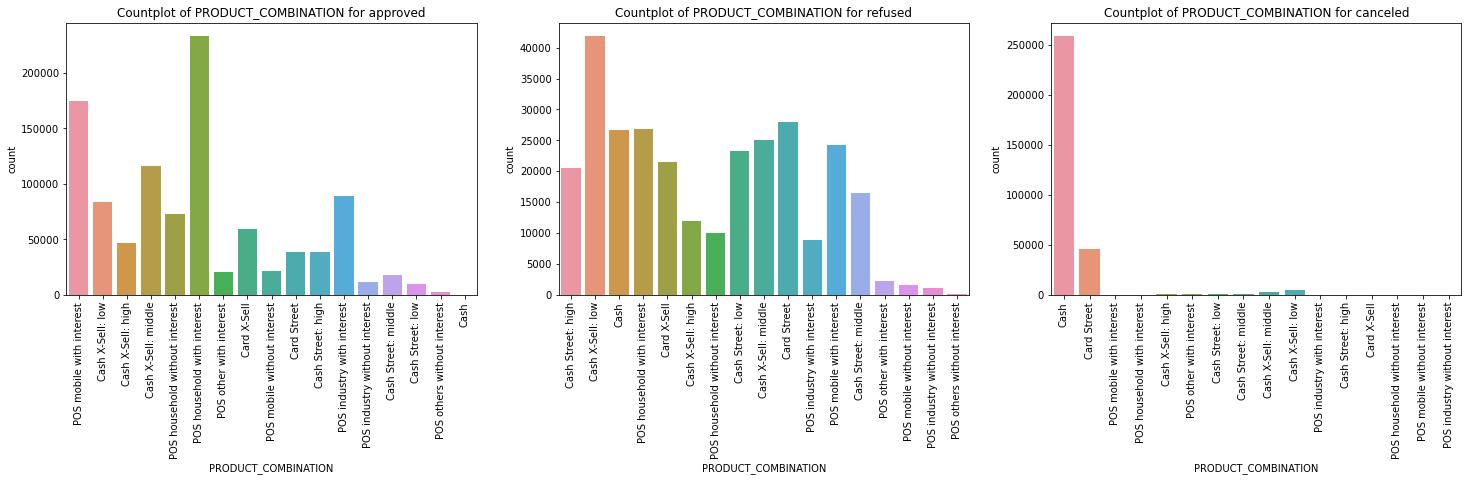

In [115]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.countplot(x=approved['PRODUCT_COMBINATION'])
plt.title('Countplot of PRODUCT_COMBINATION for approved')
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.countplot(x=refused['PRODUCT_COMBINATION'])
plt.title('Countplot of PRODUCT_COMBINATION for refused')
plt.xticks(rotation=90)
plt.subplot(1,3,3)
sns.countplot(x=canceled['PRODUCT_COMBINATION'])
plt.title('Countplot of PRODUCT_COMBINATION for canceled')
plt.xticks(rotation=90)
plt.show()

#### Most of the approved loans are for POS Household with interest
#### Most of the refused loans are for Cash X-Shell : low
#### Cash is again the most canceled loan

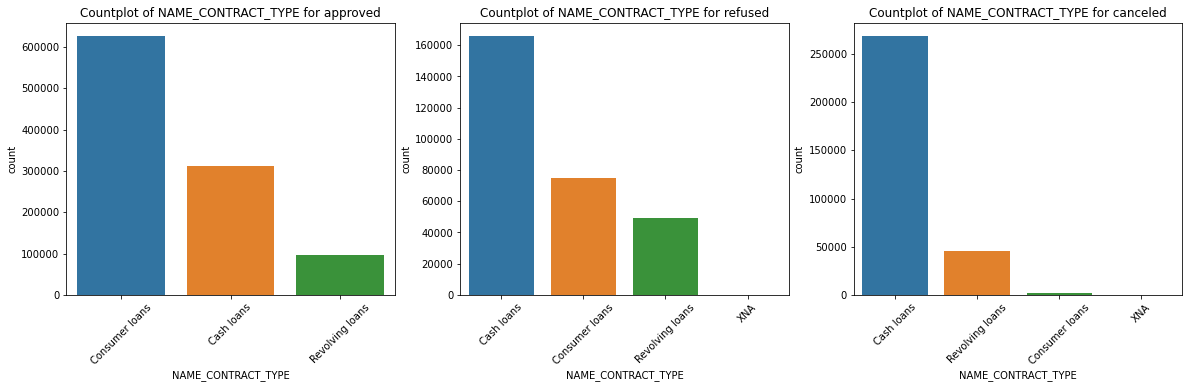

In [116]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.countplot(x=approved['NAME_CONTRACT_TYPE'])
plt.title('Countplot of NAME_CONTRACT_TYPE for approved')
plt.xticks(rotation=45)
plt.subplot(1,3,2)
sns.countplot(x=refused['NAME_CONTRACT_TYPE'])
plt.title('Countplot of NAME_CONTRACT_TYPE for refused')
plt.xticks(rotation=45)
plt.subplot(1,3,3)
sns.countplot(x=canceled['NAME_CONTRACT_TYPE'])
plt.title('Countplot of NAME_CONTRACT_TYPE for canceled')
plt.xticks(rotation=45)
plt.show()

##### Consumer loans are the most refused loan category

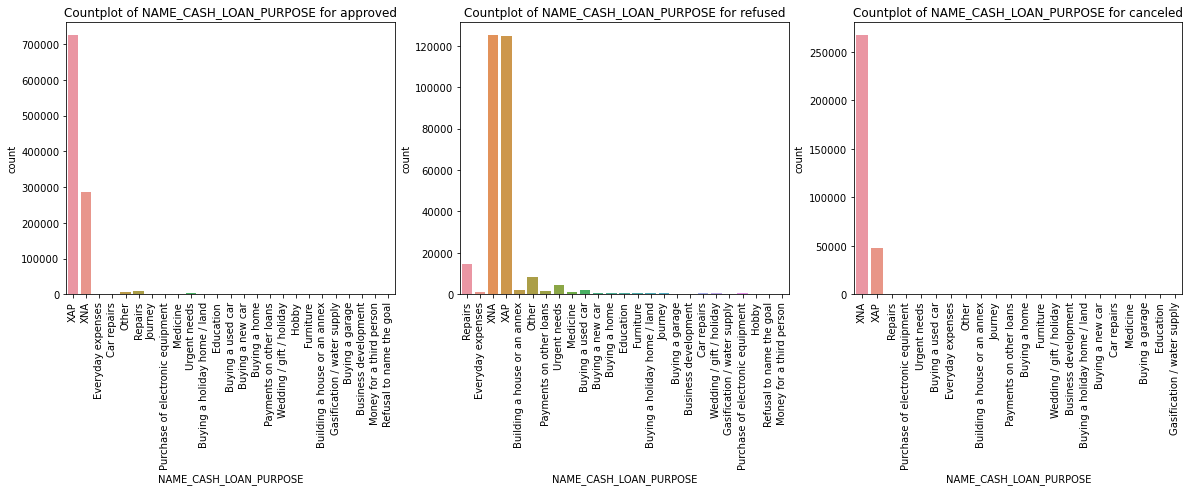

In [117]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.countplot(x=approved['NAME_CASH_LOAN_PURPOSE'])
plt.title('Countplot of NAME_CASH_LOAN_PURPOSE for approved')
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.countplot(x=refused['NAME_CASH_LOAN_PURPOSE'])
plt.title('Countplot of NAME_CASH_LOAN_PURPOSE for refused')
plt.xticks(rotation=90)
plt.subplot(1,3,3)
sns.countplot(x=canceled['NAME_CASH_LOAN_PURPOSE'])
plt.title('Countplot of NAME_CASH_LOAN_PURPOSE for canceled')
plt.xticks(rotation=90)
plt.show()

#### XAP and XNA are most approved and refused loan purpose categories

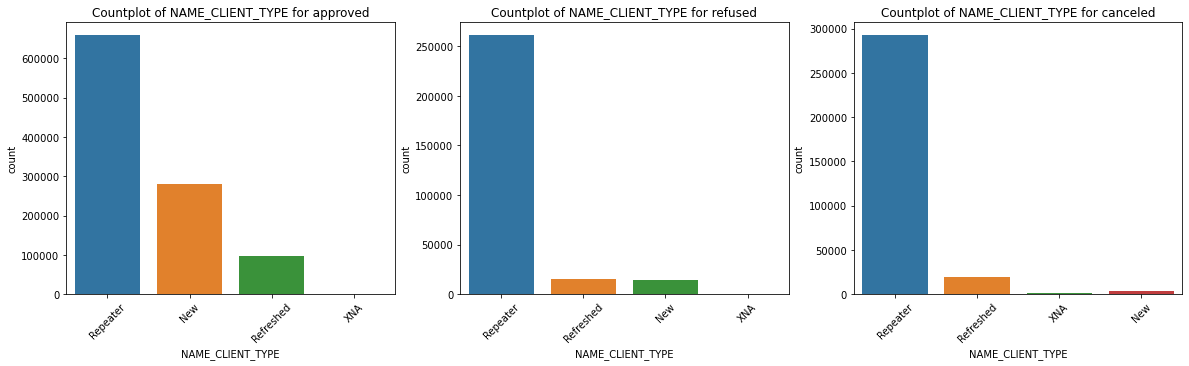

In [118]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.countplot(x=approved['NAME_CLIENT_TYPE'])
plt.title('Countplot of NAME_CLIENT_TYPE for approved')
plt.xticks(rotation=45)
plt.subplot(1,3,2)
sns.countplot(x=refused['NAME_CLIENT_TYPE'])
plt.title('Countplot of NAME_CLIENT_TYPE for refused')
plt.xticks(rotation=45)
plt.subplot(1,3,3)
sns.countplot(x=canceled['NAME_CLIENT_TYPE'])
plt.title('Countplot of NAME_CLIENT_TYPE for canceled')
plt.xticks(rotation=45)
plt.show()

#### Existing customers can avail loans more frequently/loan process is easier for existing customers

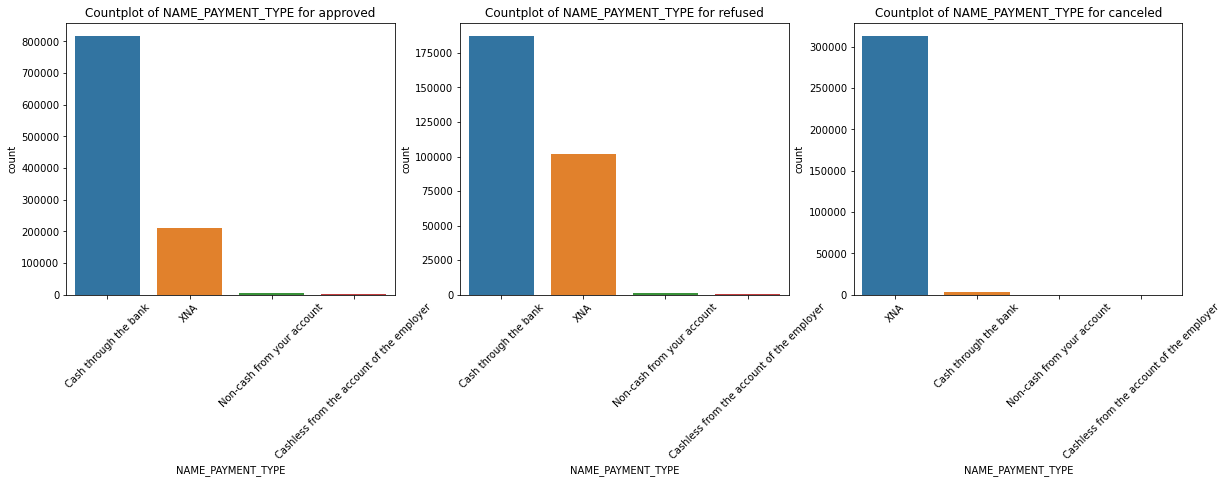

In [119]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.countplot(x=approved['NAME_PAYMENT_TYPE'])
plt.title('Countplot of NAME_PAYMENT_TYPE for approved')
plt.xticks(rotation=45)
plt.subplot(1,3,2)
sns.countplot(x=refused['NAME_PAYMENT_TYPE'])
plt.title('Countplot of NAME_PAYMENT_TYPE for refused')
plt.xticks(rotation=45)
plt.subplot(1,3,3)
sns.countplot(x=canceled['NAME_PAYMENT_TYPE'])
plt.title('Countplot of NAME_PAYMENT_TYPE for canceled')
plt.xticks(rotation=45)
plt.show()

#### Cash through bank and XNA are most approved and refused categories of payment types

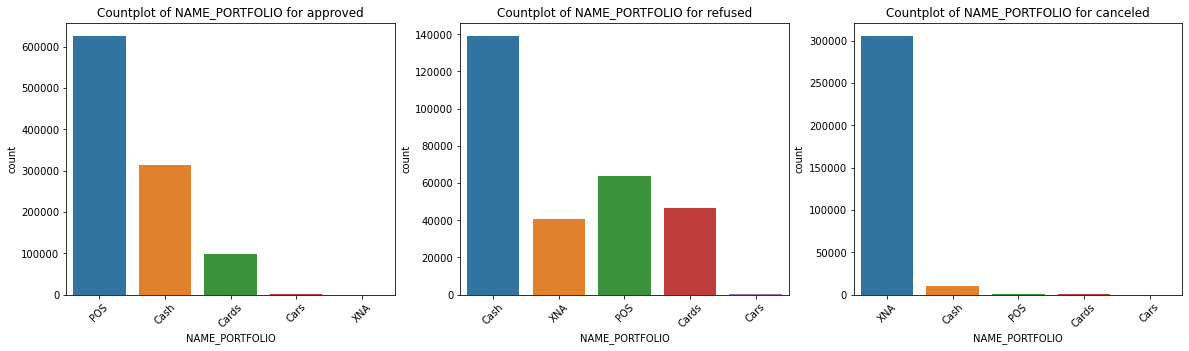

In [120]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.countplot(x=approved['NAME_PORTFOLIO'])
plt.title('Countplot of NAME_PORTFOLIO for approved')
plt.xticks(rotation=45)
plt.subplot(1,3,2)
sns.countplot(x=refused['NAME_PORTFOLIO'])
plt.title('Countplot of NAME_PORTFOLIO for refused')
plt.xticks(rotation=45)
plt.subplot(1,3,3)
sns.countplot(x=canceled['NAME_PORTFOLIO'])
plt.title('Countplot of NAME_PORTFOLIO for canceled')
plt.xticks(rotation=45)
plt.show()

#### Most approved loans are over POS and most refused ones are Cash payments. XNA are most cancelled ones

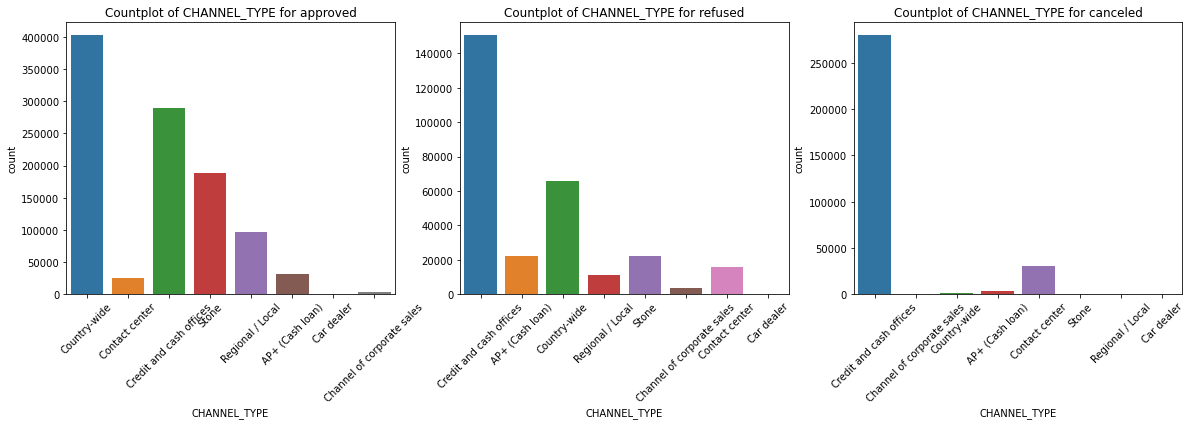

In [122]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.countplot(x=approved['CHANNEL_TYPE'])
plt.title('Countplot of CHANNEL_TYPE for approved')
plt.xticks(rotation=45)
plt.subplot(1,3,2)
sns.countplot(x=refused['CHANNEL_TYPE'])
plt.title('Countplot of CHANNEL_TYPE for refused')
plt.xticks(rotation=45)
plt.subplot(1,3,3)
sns.countplot(x=canceled['CHANNEL_TYPE'])
plt.title('Countplot of CHANNEL_TYPE for canceled')
plt.xticks(rotation=45)
plt.show()

#### Most approved loans are from Country wide channel, Credit and cash offices are most refused and cancelled categories

### Heatmap for approved loans

In [124]:
cols = ['AMT_DOWN_PAYMENT',"RATE_DOWN_PAYMENT",'AMT_CREDIT',
        'AMT_APPLICATION','CNT_PAYMENT','DAYS_TERMINATION',
     'DAYS_LAST_DUE','DAYS_FIRST_DUE','AMT_GOODS_PRICE','AMT_ANNUITY']
approved_cols = approved[cols]
approved_cor = approved_cols.corr()

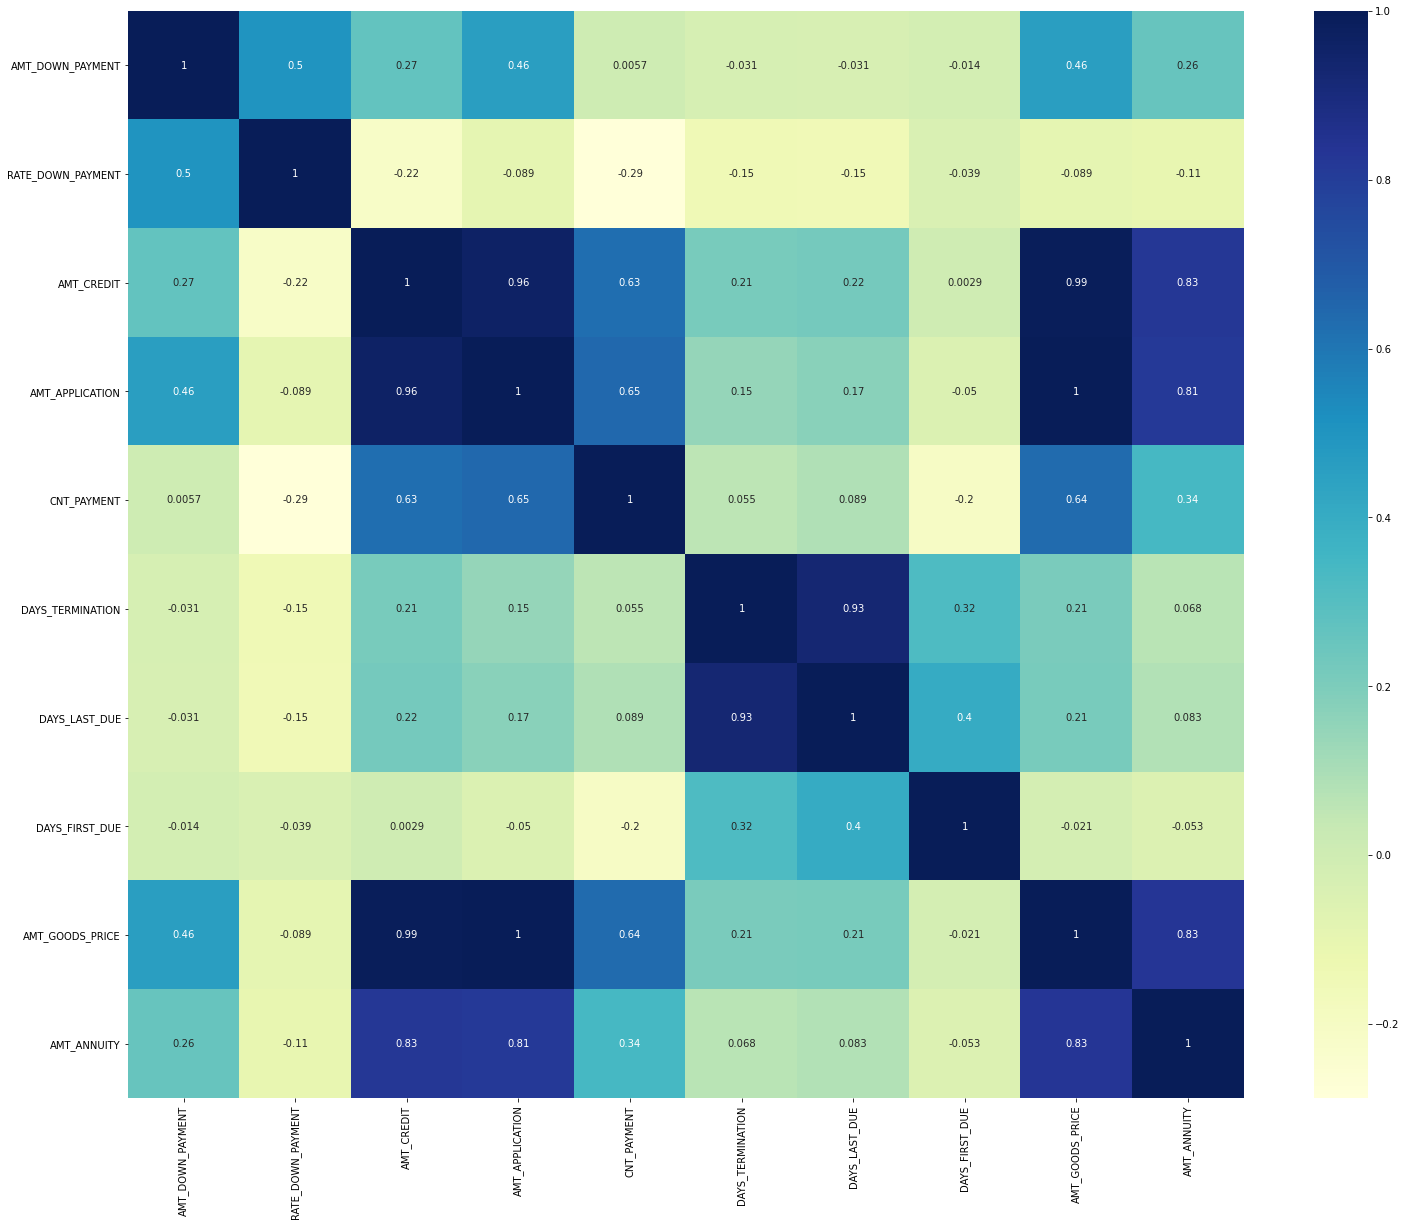

In [125]:
plt.figure(figsize=(25,20))
sns.heatmap(approved_cor,cmap="YlGnBu",annot=True)
plt.show()

#### Positive co-relations
1. AMT_GOODS_PRICE and AMT_CREDIT
2. AMT_APPLICATION and AMT_CREDIT
3. DAYS_TERMINATION and DAYS_LAST_DUE

#### Negetive co-relations
1. DAYS_FIRST_DUE and AMT_DOWN_PAYMENT
2. DAYS_FIRST_DUE and AMT_GOODS_PRICE
3. DAYS_FIRST_DUE and AMT_CREDIT

### Heatmap for Refused loans

In [127]:
cols_ref = ['AMT_DOWN_PAYMENT',"RATE_DOWN_PAYMENT",'AMT_CREDIT',
        'AMT_APPLICATION','CNT_PAYMENT','DAYS_DECISION','AMT_GOODS_PRICE','AMT_ANNUITY']
refused_cols = refused[cols_ref]
refused_cor = refused_cols.corr()

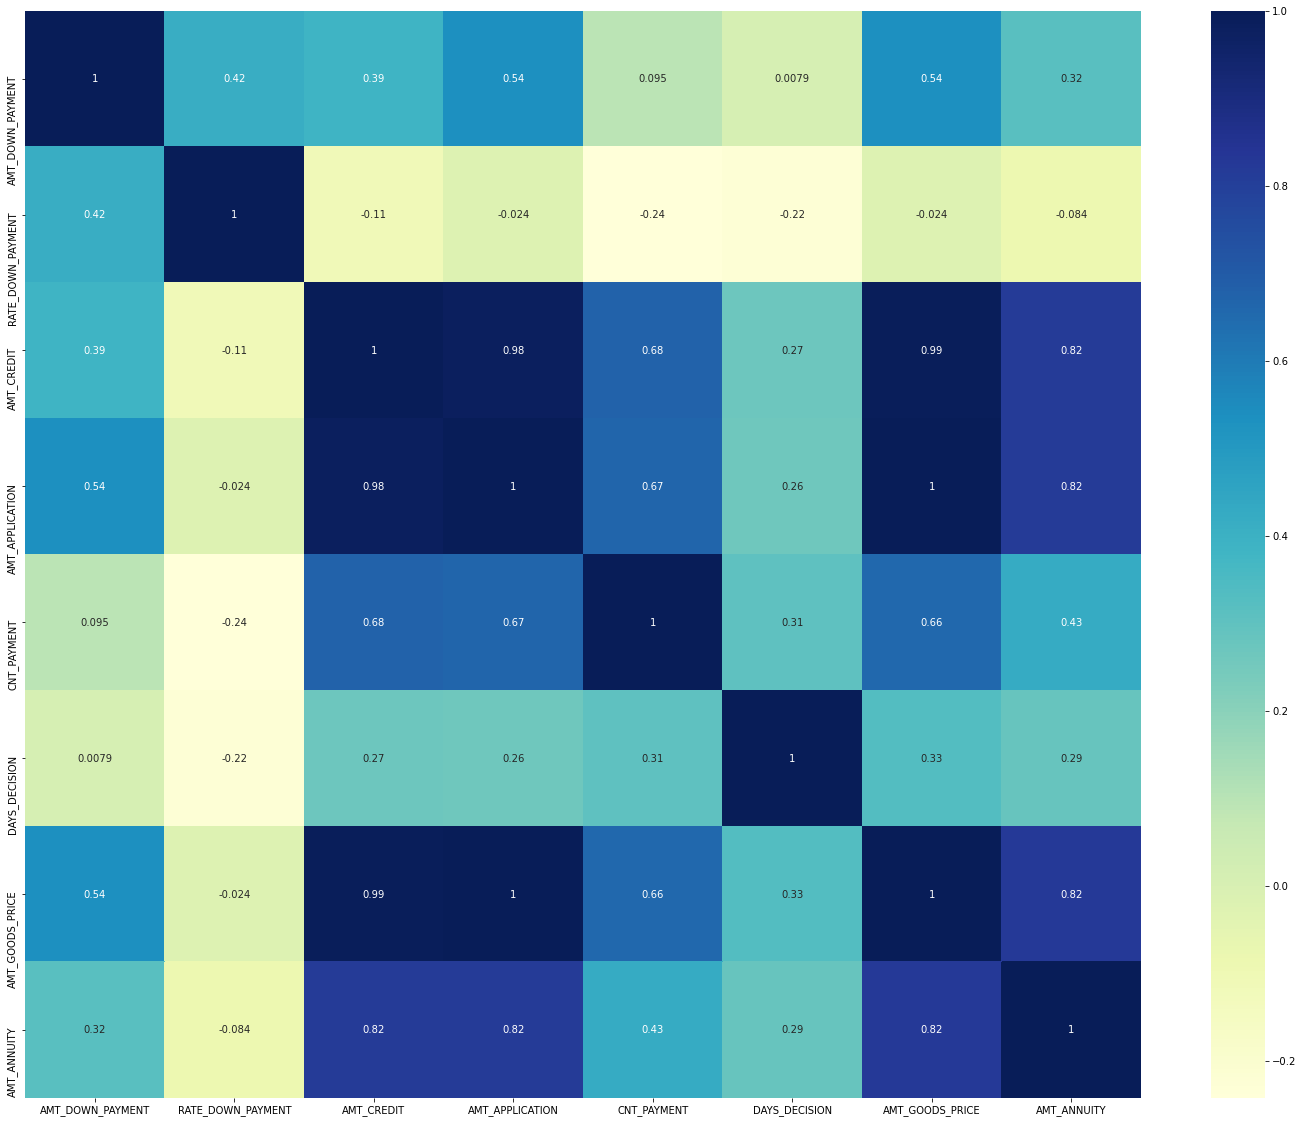

In [129]:
plt.figure(figsize=(25,20))
sns.heatmap(refused_cor,cmap="YlGnBu",annot=True)
plt.show()

#### Positive co-relations
1. AMT_GOODS_PRICE and AMT_CREDIT
2. AMT_APPLICATION and AMT_CREDIT
3. DAYS_TERMINATION and DAYS_LAST_DUE

#### Negative co-relations
1. DAYS_FIRST_DUE and AMT_DOWN_PAYMENT
2. DAYS_FIRST_DUE and AMT_GOODS_PRICE
3. DAYS_FIRST_DUE and AMT_CREDIT

In [130]:
x1 = approved_cor.unstack() 
x1.sort_values(ascending=False).drop_duplicates().head(10)

AMT_ANNUITY      AMT_ANNUITY         1.000000
AMT_CREDIT       AMT_GOODS_PRICE     0.993244
                 AMT_APPLICATION     0.961757
DAYS_LAST_DUE    DAYS_TERMINATION    0.927990
AMT_ANNUITY      AMT_GOODS_PRICE     0.830859
AMT_CREDIT       AMT_ANNUITY         0.826005
AMT_APPLICATION  AMT_ANNUITY         0.814343
CNT_PAYMENT      AMT_APPLICATION     0.645581
                 AMT_GOODS_PRICE     0.635505
AMT_CREDIT       CNT_PAYMENT         0.626292
dtype: float64

In [132]:
x1.sort_values(ascending=False).drop_duplicates().tail(10)

RATE_DOWN_PAYMENT  DAYS_FIRST_DUE      -0.039178
DAYS_FIRST_DUE     AMT_APPLICATION     -0.049532
AMT_ANNUITY        DAYS_FIRST_DUE      -0.053295
RATE_DOWN_PAYMENT  AMT_GOODS_PRICE     -0.088864
                   AMT_ANNUITY         -0.105081
DAYS_TERMINATION   RATE_DOWN_PAYMENT   -0.145461
RATE_DOWN_PAYMENT  DAYS_LAST_DUE       -0.147562
DAYS_FIRST_DUE     CNT_PAYMENT         -0.204907
AMT_CREDIT         RATE_DOWN_PAYMENT   -0.216551
RATE_DOWN_PAYMENT  CNT_PAYMENT         -0.287845
dtype: float64

In [131]:
x2 = refused_cor.unstack() 
x2.sort_values(ascending=False).drop_duplicates().head(10)

AMT_ANNUITY      AMT_ANNUITY        1.000000
AMT_GOODS_PRICE  AMT_APPLICATION    0.999699
AMT_CREDIT       AMT_GOODS_PRICE    0.991777
                 AMT_APPLICATION    0.983785
AMT_GOODS_PRICE  AMT_ANNUITY        0.822538
AMT_ANNUITY      AMT_CREDIT         0.819867
                 AMT_APPLICATION    0.817869
AMT_CREDIT       CNT_PAYMENT        0.677433
AMT_APPLICATION  CNT_PAYMENT        0.669782
CNT_PAYMENT      AMT_GOODS_PRICE    0.658065
dtype: float64

In [133]:
x2.sort_values(ascending=False).drop_duplicates().tail(10)

DAYS_DECISION      AMT_ANNUITY        0.286620
AMT_CREDIT         DAYS_DECISION      0.270099
AMT_APPLICATION    DAYS_DECISION      0.264581
AMT_DOWN_PAYMENT   CNT_PAYMENT        0.094697
                   DAYS_DECISION      0.007927
RATE_DOWN_PAYMENT  AMT_GOODS_PRICE   -0.023624
                   AMT_ANNUITY       -0.084484
                   AMT_CREDIT        -0.111684
                   DAYS_DECISION     -0.224665
                   CNT_PAYMENT       -0.242238
dtype: float64

In [139]:
def terminate(x):
    if x<0:
        return 'Loan Terminated'
    else:
        return 'Loan Open'

approved['STATUS']  =approved['DAYS_TERMINATION'].apply(terminate)

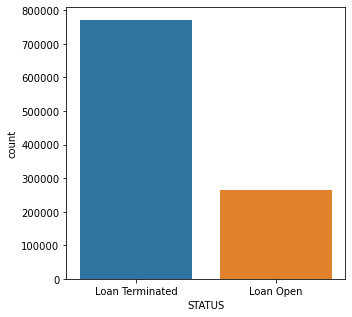

In [141]:
plt.figure(figsize=(5,5))
sns.countplot(x=approved['STATUS'],data=approved)
plt.show()

### After analysing the previous dataset we have found that more than 7 lacs loans has been terminated and around 25 lac are in open state